# Feature Scaling



In [28]:
import numpy as np
import pandas as pd

<hr>

### C. Maximum Absolute Scaler

- Maximum Absolute Scaler formula $\displaystyle x' = \frac {x} {|x|_\textrm{max}}$

- Misal $x$ = [1, 2, -4] maka $|x|_\textrm{max} = 4$ sehingga $x'$ = [1/4, 2/4, -4/4]

- Data hasil MaxAbsScaler memiliki range __-1__ sampai __1__.

In [29]:
# maximum absolute
x = [1,2,-4]
np.max(np.abs(x))

4

In [30]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})
df.head(2)

,TB,BB
0,1.72,76
1,1.81,65


<hr>

### C1. Manual Calculation

In [31]:
# 1. manual calculation
df['masTB'] = df['TB'] / np.max(np.abs(df['TB']))
df['masBB'] = df['BB'] / np.max(np.abs(df['BB']))
df

,TB,BB,masTB,masBB
0,1.72,76,0.891192,0.775510
1,1.81,65,0.937824,0.663265
2,1.93,87,1.000000,0.887755
3,1.67,55,0.865285,0.561224
4,1.85,60,0.958549,0.612245
5,1.66,78,0.860104,0.795918
6,1.59,98,0.823834,1.000000
7,1.76,77,0.911917,0.785714
8,1.88,74,0.974093,0.755102
9,1.78,64,0.922280,0.653061


<hr>

### C2. Sklearn ```maxabs_scale()```

In [32]:
# 2. maxabsscaler sklearn
from sklearn.preprocessing import maxabs_scale

In [33]:
df['masTB2'] = maxabs_scale(df['TB'])
df['masBB2'] = maxabs_scale(df['BB'])
df

,TB,BB,masTB,masBB,masTB2,masBB2
0,1.72,76,0.891192,0.775510,0.891192,0.775510
1,1.81,65,0.937824,0.663265,0.937824,0.663265
2,1.93,87,1.000000,0.887755,1.000000,0.887755
3,1.67,55,0.865285,0.561224,0.865285,0.561224
4,1.85,60,0.958549,0.612245,0.958549,0.612245
5,1.66,78,0.860104,0.795918,0.860104,0.795918
6,1.59,98,0.823834,1.000000,0.823834,1.000000
7,1.76,77,0.911917,0.785714,0.911917,0.785714
8,1.88,74,0.974093,0.755102,0.974093,0.755102
9,1.78,64,0.922280,0.653061,0.922280,0.653061


<hr>

### C3. Sklearn ```MaxAbsScaler()```

In [34]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

In [35]:
scaler.fit(df[['TB', 'BB']])
mas = scaler.transform(df[['TB', 'BB']])

df['masTB3'] = mas[:, 0]
df['masBB3'] = mas[:, 1]
df

,TB,BB,masTB,masBB,masTB2,masBB2,masTB3,masBB3
0,1.72,76,0.891192,0.775510,0.891192,0.775510,0.891192,0.775510
1,1.81,65,0.937824,0.663265,0.937824,0.663265,0.937824,0.663265
2,1.93,87,1.000000,0.887755,1.000000,0.887755,1.000000,0.887755
3,1.67,55,0.865285,0.561224,0.865285,0.561224,0.865285,0.561224
4,1.85,60,0.958549,0.612245,0.958549,0.612245,0.958549,0.612245
5,1.66,78,0.860104,0.795918,0.860104,0.795918,0.860104,0.795918
6,1.59,98,0.823834,1.000000,0.823834,1.000000,0.823834,1.000000
7,1.76,77,0.911917,0.785714,0.911917,0.785714,0.911917,0.785714
8,1.88,74,0.974093,0.755102,0.974093,0.755102,0.974093,0.755102
9,1.78,64,0.922280,0.653061,0.922280,0.653061,0.922280,0.653061


In [36]:
# inverse transform
inmas = scaler.inverse_transform(df[['masTB3', 'masBB3']])
df['inmasTB'] = inmas[:, 0]
df['inmasBB'] = inmas[:, 1]
df

,TB,BB,masTB,masBB,masTB2,masBB2,masTB3,masBB3,inmasTB,inmasBB
0,1.72,76,0.891192,0.775510,0.891192,0.775510,0.891192,0.775510,1.72,76.0
1,1.81,65,0.937824,0.663265,0.937824,0.663265,0.937824,0.663265,1.81,65.0
2,1.93,87,1.000000,0.887755,1.000000,0.887755,1.000000,0.887755,1.93,87.0
3,1.67,55,0.865285,0.561224,0.865285,0.561224,0.865285,0.561224,1.67,55.0
4,1.85,60,0.958549,0.612245,0.958549,0.612245,0.958549,0.612245,1.85,60.0
5,1.66,78,0.860104,0.795918,0.860104,0.795918,0.860104,0.795918,1.66,78.0
6,1.59,98,0.823834,1.000000,0.823834,1.000000,0.823834,1.000000,1.59,98.0
7,1.76,77,0.911917,0.785714,0.911917,0.785714,0.911917,0.785714,1.76,77.0
8,1.88,74,0.974093,0.755102,0.974093,0.755102,0.974093,0.755102,1.88,74.0
9,1.78,64,0.922280,0.653061,0.922280,0.653061,0.922280,0.653061,1.78,64.0


<hr>

#### Apakah MaxAbsScaler merubah sebaran data?

Tidak

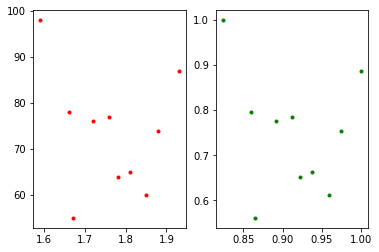

In [39]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.plot(df['TB'], df['BB'], 'r.')
plt.subplot(122)
plt.plot(df['masTB'], df['masBB'], 'g.')
plt.show()